In [ ]:
#이미지가 70000개 각 이미지에는 784의 특성 28*28 

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
#X는 이미지 데이터 특성 28*28=784 (컬럼) 각 특성은 0~255의 픽셀강도를 나타냄 
#Y는 이미지 데이터의 정수 값 (답)

In [4]:
X,y =mnist["data"], mnist["target"]
X.shape , y.shape

((70000, 784), (70000,))

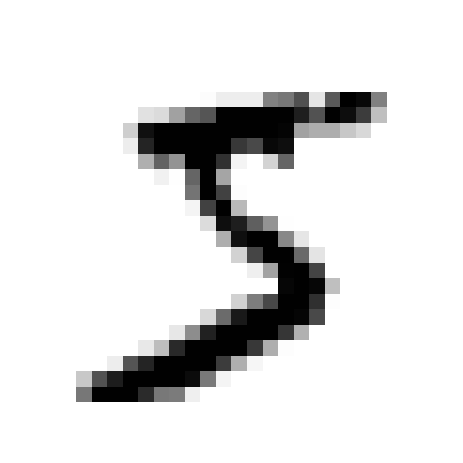

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit=X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [6]:
y[0]

'5'

In [7]:
y=y.astype(np.uint8)

In [8]:
#훈련데이터 테스트 데이터 나누기
X_train, X_test, y_train, y_test = X[:6000], X[6000:], y[:6000], y[6000:]

1. 이진 분류기 훈련
문제를 단순화해서 하나의 숫자를 분류해보기

In [10]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

1. - 1 확률적 경사 하강법 - SGDClassifier 
SGD는 한번에 하나의 훈련 샘플을 독립적으로 처리

In [11]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [12]:
sgd_clf.predict([some_digit])

array([ True])

성능측정 cross_val_score() - 3겹인 k-fold 교차검증

In [25]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)
for  train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.962
0.956
0.9665


In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.962 , 0.956 , 0.9665])

5가 아닌 값을 예측하는 더미변수 데이터 만들기

In [28]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        return self
    def predict(self, x):
        return np.zeros((len(x),1),dtype=bool)
    
never_5_clf = Never5Classifier()    

In [29]:
np.zeros((len(x),1)

SyntaxError: unexpected EOF while parsing (<ipython-input-29-6aea5e1f1853>, line 1)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")